In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

X[:5], y[:5]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]),
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

In [2]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [4]:
def show_contour_plot(X, y, clf):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()

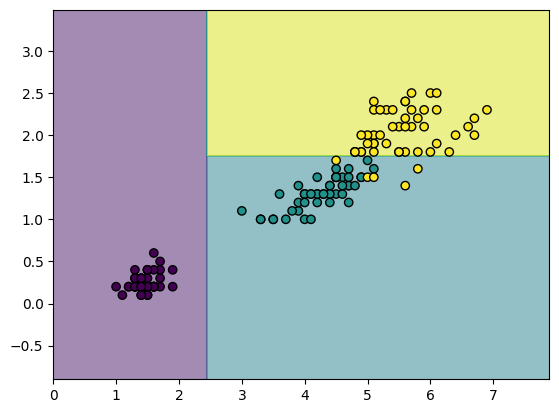

In [5]:
import numpy as np
from matplotlib import pyplot as plt
show_contour_plot(X, y, tree_clf)

In [6]:
tree_clf.predict_proba([[4, 2]]).round(2), tree_clf.predict([[5, 1.5]])

(array([[0.  , 0.02, 0.98]]), array([1]))

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X, y)

DecisionTreeClassifier(random_state=42)

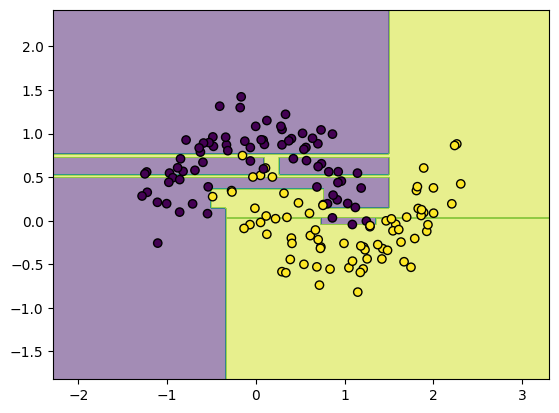

In [8]:
show_contour_plot(X, y, tree_clf1)

In [9]:
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf2.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

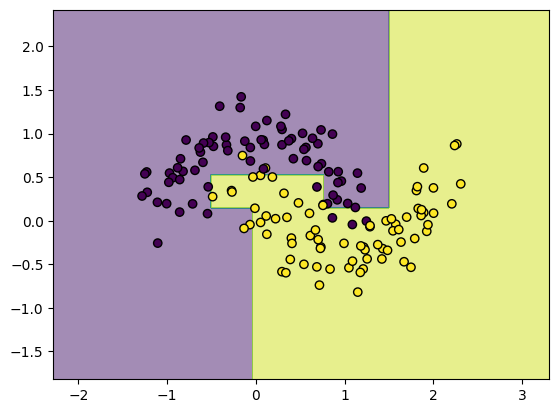

In [10]:
show_contour_plot(X, y, tree_clf2)

In [11]:
X_test, y_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

tree_clf1.score(X_test, y_test)

0.898

In [12]:
tree_clf2.score(X_test, y_test)

0.92

DecisionTreeRegressor(max_depth=2, random_state=42)

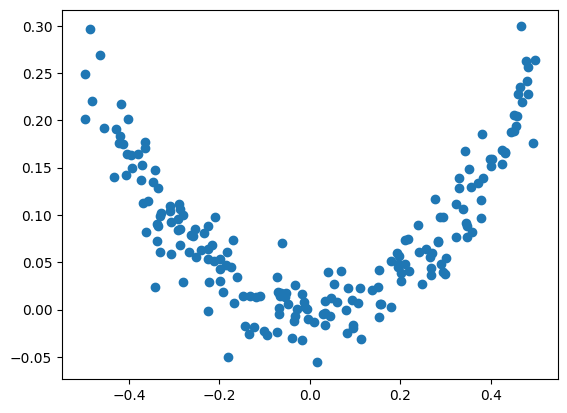

In [13]:
from sklearn.tree import DecisionTreeRegressor

X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

plt.scatter(X_quad, y_quad)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

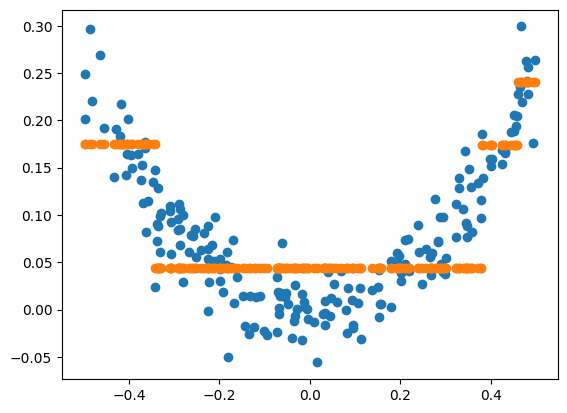

In [14]:
y_quad_pred = tree_reg.predict(X_quad)

plt.scatter(X_quad, y_quad)
plt.scatter(X_quad, y_quad_pred)

In [15]:
export_graphviz(
    tree_reg,
    out_file="reg_tree.dot",
    feature_names=["x"],
    rounded=True,
    filled=True
)

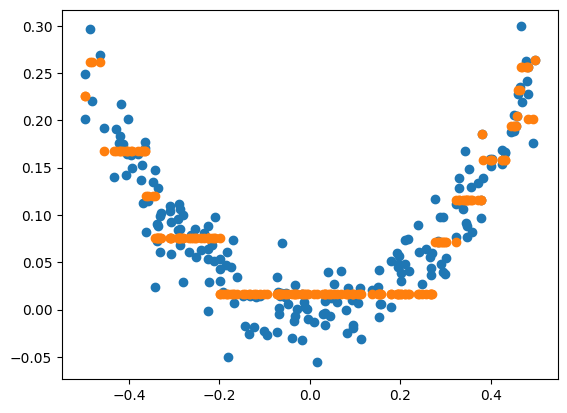

In [16]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_quad, y_quad)
y_quad_pred = tree_reg.predict(X_quad)

plt.scatter(X_quad, y_quad)
plt.scatter(X_quad, y_quad_pred)

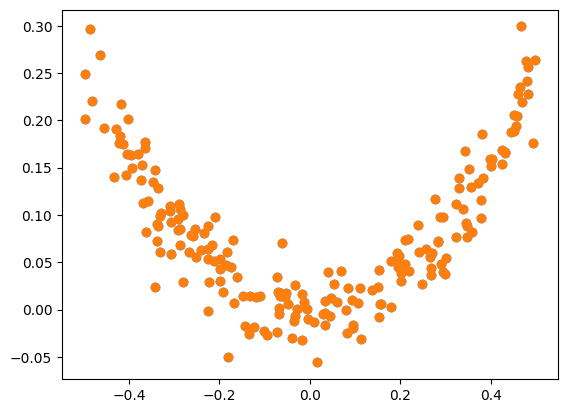

In [17]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_quad, y_quad)
y_quad_pred = tree_reg.predict(X_quad)

plt.scatter(X_quad, y_quad)
plt.scatter(X_quad, y_quad_pred)

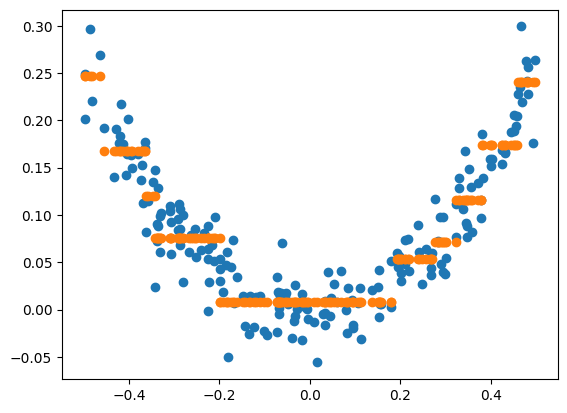

In [18]:
tree_reg = DecisionTreeRegressor(max_leaf_nodes=10, random_state=42)
tree_reg.fit(X_quad, y_quad)
y_quad_pred = tree_reg.predict(X_quad)

plt.scatter(X_quad, y_quad)
plt.scatter(X_quad, y_quad_pred)

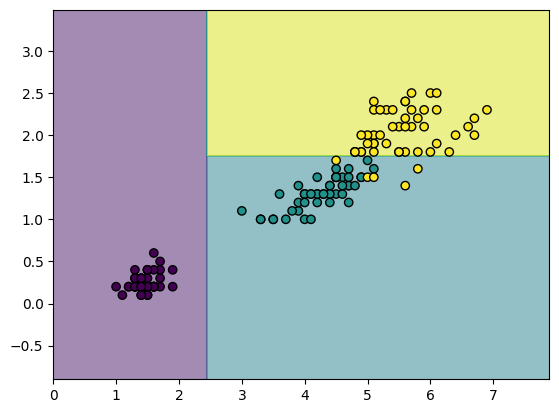

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(
    StandardScaler(),
    PCA()
)

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

X_rotated = pca_pipeline.fit_transform(X)

tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X, y)

show_contour_plot(X, y, tree_clf_pca)

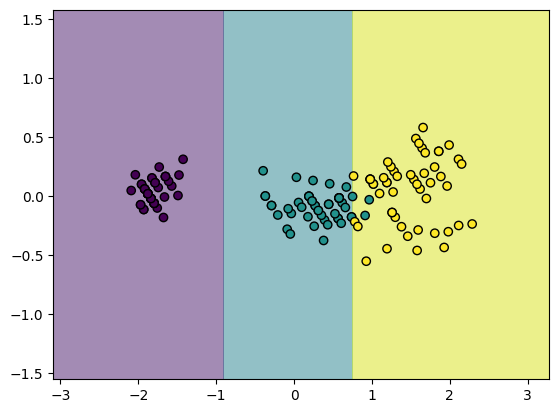

In [20]:
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_rotated, y)

show_contour_plot(X_rotated, y, tree_clf_pca)